In [8]:
import sys
import gc

# Memory allocation example
def demonstrate_memory_management():
    # Objects are allocated in private heap
    my_list = [1, 2, 3, 4, 5]  # Allocated in heap
    
    # Check object reference count
    ref_count = sys.getrefcount(my_list)
    print(f"Reference count: {ref_count}")
    
    # Memory usage
    memory_usage = sys.getsizeof(my_list)
    print(f"Memory usage: {memory_usage} bytes")

demonstrate_memory_management()

Reference count: 2
Memory usage: 104 bytes


In [9]:
import sys
import gc

# Memory allocation example
def demonstrate_memory_management():
    # Objects are allocated in private heap
    my_list = [1, 2, 3, 4,8]  # Allocated in heap
    
    # Check object reference count
    ref_count = sys.getrefcount(my_list)
    print(f"Reference count: {ref_count}")
    
    # Memory usage
    memory_usage = sys.getsizeof(my_list)
    print(f"Memory usage: {memory_usage} bytes")

demonstrate_memory_management()

Reference count: 2
Memory usage: 104 bytes


In [10]:
import sys

def reference_counting_demo():
    # Create object
    data = [1, 2, 3]
    print(f"Initial ref count: {sys.getrefcount(data)}")
    
    # Assign to another variable
    data2 = data
    print(f"After assignment: {sys.getrefcount(data)}")
    
    # Delete reference
    del data2
    print(f"After deletion: {sys.getrefcount(data)}")
reference_counting_demo()

Initial ref count: 2
After assignment: 3
After deletion: 2


In [ ]:
import gc
import weakref

class MLModel:
    def __init__(self, name):
        self.name = name
        self.data = []

def garbage_collection_demo():
    # Create circular reference
    model1 = MLModel("Model1")
    model2 = MLModel("Model2")
    model1.partner = model2
    model2.partner = model1
    
    # Check garbage collection
    print(f"Objects before GC: {len(gc.get_objects())}")
    
    # Force garbage collection
    collected = gc.collect()
    print(f"Objects collected: {collected}")
    
    # Monitor object lifecycle
    def callback(ref):
        print("Object was garbage collected")
    
    weak_ref = weakref.ref(model1, callback)

garbage_collection_demo()

Objects before GC: 81478
Objects collected: 10


In [18]:
pip install memory-profiler


  Using cached memory_profiler-0.61.0-py3-none-any.whl.metadata (20 kB)
Using cached memory_profiler-0.61.0-py3-none-any.whl (31 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:

import numpy as np
import pandas as pd
from memory_profiler import profile

class MemoryEfficientMLWorkflow:
    def __init__(self):
        self.data = None
        self.model = None
    
    @profile
    def load_and_process_data(self, filepath):
        """Memory-efficient data loading"""
        # Use chunking for large datasets
        chunk_size = 10000
        chunks = []
        
        for chunk in pd.read_csv(filepath, chunksize=chunk_size):
            # Process chunk
            processed_chunk = self.preprocess_chunk(chunk)
            chunks.append(processed_chunk)
        
        # Combine chunks efficiently
        self.data = pd.concat(chunks, ignore_index=True)
        
        # Clear intermediate variables
        del chunks
        gc.collect()
    
    def preprocess_chunk(self, chunk):
        """Memory-efficient preprocessing"""
        # Use view instead of copy when possible
        numeric_columns = chunk.select_dtypes(include=[np.number])
        
        # Optimize data types
        chunk = self.optimize_dtypes(chunk)
        
        return chunk
    
    def optimize_dtypes(self, df):
        """Optimize pandas dtypes to reduce memory"""
        for col in df.columns:
            if df[col].dtype == 'int64':
                if df[col].min() >= 0 and df[col].max() <= 255:
                    df[col] = df[col].astype('uint8')
                elif df[col].min() >= -128 and df[col].max() <= 127:
                    df[col] = df[col].astype('int8')
            elif df[col].dtype == 'float64':
                df[col] = df[col].astype('float32')
        
        return df
    
    def __del__(self):
        """Cleanup when object is destroyed"""
        if hasattr(self, 'data') and self.data is not None:
            del self.data
        gc.collect()




In [20]:
from datetime import datetime

class ModelRegistry:
    """Example of dictionary usage in ML workflows"""
    
    def __init__(self):
        # Store multiple models with configurations
        self.models = {}
        self.metrics = {}
        self.feature_importance = {}
    
    def register_model(self, model_name, model, config):
        """Register model with its configuration"""
        self.models[model_name] = {
            'model_object': model,
            'config': config,
            'trained': False,
            'timestamp': datetime.now()
        }
    
    def store_metrics(self, model_name, metrics_dict):
        """Store evaluation metrics for a model"""
        self.metrics[model_name] = metrics_dict
    
    def get_best_model(self, metric='accuracy'):
        """Find best performing model based on metric"""
        if not self.metrics:
            return None
        
        best_model = max(
            self.metrics.items(),
            key=lambda x: x[1].get(metric, 0)
        )
        return best_model[0]  # Return model name
    
    def compare_models(self):
        """Compare all models using stored metrics"""
        comparison = {}
        for model_name, metrics in self.metrics.items():
            comparison[model_name] = {
                'accuracy': metrics.get('accuracy', 0),
                'precision': metrics.get('precision', 0),
                'recall': metrics.get('recall', 0),
                'f1_score': metrics.get('f1_score', 0)
            }
        return comparison

# Usage example
registry = ModelRegistry()

# Register models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

rf_config = {'n_estimators': 100, 'max_depth': 10}
svm_config = {'C': 1.0, 'kernel': 'rbf'}

registry.register_model('random_forest', RandomForestClassifier(**rf_config), rf_config)
registry.register_model('svm', SVC(**svm_config), svm_config)

# Store metrics
registry.store_metrics('random_forest', {
    'accuracy': 0.85, 'precision': 0.83, 'recall': 0.87, 'f1_score': 0.85
})
registry.store_metrics('svm', {
    'accuracy': 0.82, 'precision': 0.80, 'recall': 0.84, 'f1_score': 0.82
})

In [21]:
text_data = ['Hello World!', 'Python ML', 'Data Science@']
cleaned_text = [
    ''.join([char.lower() for char in text if char.isalnum() or char.isspace()])
    for text in text_data
]
cleaned_text

['hello world', 'python ml', 'data science']

In [ ]:
# Create polynomial features
    numeric_cols = ['age', 'income', 'credit_score']
    polynomial_features = [
        f"{col}_squared" for col in numeric_cols
    ]
    
    # Add polynomial features to dataframe
    for i, col in enumerate(numeric_cols):
        df[polynomial_features[i]] = df[col] ** 2
    
    # Create interaction features
    interaction_features = [
        f"{col1}_{col2}_interaction" 
        for i, col1 in enumerate(numeric_cols)
        for col2 in numeric_cols[i+1:]
    ]
    
    # Log transformations for skewed features
    skewed_features = ['income', 'credit_score']
    log_features = [f"log_{col}" for col in skewed_features]
    
    for i, col in enumerate(skewed_features):
        df[log_features[i]] = np.log1p(df[col])

NameError: name 'df' is not defined

In [2]:
import numpy as np

In [ ]:
print(np.random.RandomState(42).normal(loc=0.0,scale=0.01,size=10)) # Example usage of RandomState


0.04480611116987562


In [41]:
import numpy as np

class Perceptron:
    def __init__(self,learning_rate=0.01,n_iter=500,random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        self.weights=None
        self.bias=None
        self.error=[]
        
    def fit(self,X,y):
        random_generator = np.random.RandomState(self.random_state)
        self.weights = random_generator.normal(loc=0.0,scale=0.01,size=X.shape[1])
        self.bias = 0.0
        self.errors_=[]
        # what this errors_ ( _ means private variable)
        for _ in range(self.n_iter):
            errors=0
            for xi,target in zip(X,y):
                predication = self.predict(xi)
                update = self.learning_rate * (target - predication)
                self.weights += update * xi
                self.bias+=update
                errors += int(update !=0.0) # 
            self.error.append(errors)
            print(f'errors in iteration {_+1} : {errors}')
        print(f'Final weights: {self.weights}, Final bias: {self.bias}')
        print(f'Final error: {self.error}')
        print(f'Final prediction: {self.predict(X)}')
        print(f'Final net input: {self.net_input(X)}')
        return self
    def net_input(self,X):
        return np.dot(X,self.weights) + self.bias
    
    def predict(self,X):
        return np.where(self.net_input(X)>=100,1,0)
    
    

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:100,[0,2]]
y = iris.target[:1]

y = np.where(y==0,0,1) # Convert to binary classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ppn = Perceptron(learning_rate=0.01, n_iter=50)
ppn.fit(X_train, y_train)

errors in iteration 1 : 42
errors in iteration 2 : 42
errors in iteration 3 : 42
errors in iteration 4 : 42
errors in iteration 5 : 42
errors in iteration 6 : 42
errors in iteration 7 : 42
errors in iteration 8 : 42
errors in iteration 9 : 42
errors in iteration 10 : 42
errors in iteration 11 : 42
errors in iteration 12 : 42
errors in iteration 13 : 42
errors in iteration 14 : 42
errors in iteration 15 : 42
errors in iteration 16 : 42
errors in iteration 17 : 42
errors in iteration 18 : 42
errors in iteration 19 : 42
errors in iteration 20 : 42
errors in iteration 21 : 42
errors in iteration 22 : 42
errors in iteration 23 : 42
errors in iteration 24 : 42
errors in iteration 25 : 42
errors in iteration 26 : 42
errors in iteration 27 : 42
errors in iteration 28 : 42
errors in iteration 29 : 42
errors in iteration 30 : 42
errors in iteration 31 : 42
errors in iteration 32 : 42
errors in iteration 33 : 42
errors in iteration 34 : 42
errors in iteration 35 : 42
errors in iteration 36 : 42
e

In [47]:
y_pred = ppn.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[12  0]
 [ 0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# K-mean clustering

In [ ]:
# K-mean clustering
import numpy as np
import math
import random

def euclidean_distance(point1, point2):
    distance =0.0
    for i in range(len(point1)):
        difference = point1[i] - point2[i]
        distance += difference ** 2
    return math.sqrt(distance)

def calculate_centroids(points):
    if not points:
        return []
    n_dims = len(points[0])
    sums= [0.0] * n_dims
    for point in points:
        for i in range(n_dims):
            sums[i] += point[i]
    return [s/len(points) for s in sums]

def kmeans(data,k,max_iterations=100):
    centroids = random.sample(data,k)
    
    for _ in range(max_iterations):
        clusters = [[] for _ in range(k)]
        # assign points to the closest centroid
        for point in data:
            distances = [ euclidean_distance(point,centroid) for centroid in centroids ]
            closest_centroid = distances.index(min(distances))
            clusters[closest_centroid].append(point)
        
        # calculate centroids
        new_centroids = []
        for cluster in clusters:
            centroid = calculate_centroids(cluster)
            new_centroids.append(centroid)
        if new_centroids == centroids:
            break
        centroids = new_centroids
    
    return centroids, clusters

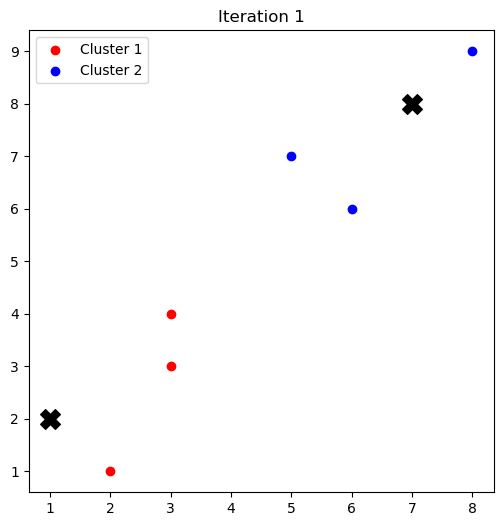

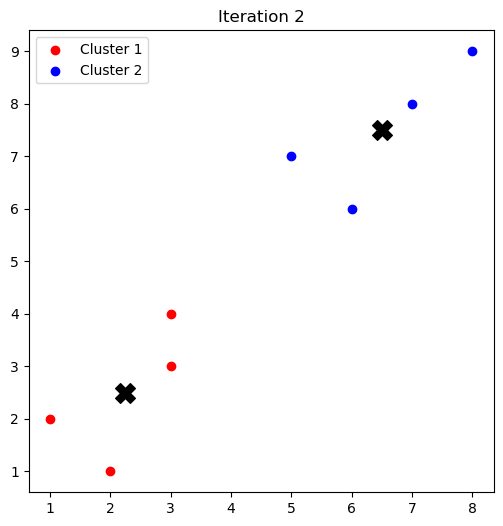

Centroids: [[2.25, 2.5], [6.5, 7.5]]
Clusters: [[[1, 2], [2, 1], [3, 4], [3, 3]], [[5, 7], [8, 9], [7, 8], [6, 6]]]


In [3]:
import random
import math
import matplotlib.pyplot as plt

# --- Euclidean distance function ---
def euclidean_distance(point1, point2):
    distance = 0.0
    for i in range(len(point1)):
        difference = point1[i] - point2[i]
        squared_difference = difference ** 2
        distance += squared_difference
    return math.sqrt(distance)

# --- Centroid calculation ---
def calculate_centroid(points):
    if not points:
        return []
    n_dims = len(points[0])
    sums = [0.0] * n_dims
    for point in points:
        for i in range(n_dims):
            sums[i] += point[i]
    centroid = []
    for i in range(n_dims):
        mean_value = sums[i] / len(points)
        centroid.append(mean_value)
    return centroid

# --- K-means with visualization ---
def kmeans_visual(data, k, max_iterations=100):
    centroids = random.sample(data, k)

    for iteration in range(max_iterations):
        # Step 1: Create empty clusters
        clusters = [[] for _ in range(k)]

        # Step 2: Assign each point
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid_index = distances.index(min(distances))
            clusters[closest_centroid_index].append(point)

        # --- Visualization ---
        colors = ['red', 'blue', 'green', 'purple', 'orange']
        plt.figure(figsize=(6, 6))
        for cluster_index, cluster in enumerate(clusters):
            xs = [p[0] for p in cluster]
            ys = [p[1] for p in cluster]
            plt.scatter(xs, ys, color=colors[cluster_index], label=f"Cluster {cluster_index+1}")
        for centroid in centroids:
            plt.scatter(centroid[0], centroid[1], color='black', marker='X', s=200)
        plt.title(f"Iteration {iteration+1}")
        plt.legend()
        plt.show()

        # Step 3: Calculate new centroids
        new_centroids = [calculate_centroid(cluster) for cluster in clusters]

        # Step 4: Check for convergence
        if new_centroids == centroids:
            break
        centroids = new_centroids

    return centroids, clusters

# --- Example data ---
data = [
    [1, 2], [2, 1], [3, 4], [5, 7],
    [3, 3], [8, 9], [7, 8], [6, 6]
]

final_centroids, final_clusters = kmeans_visual(data, k=2)
print("Centroids:", final_centroids)
print("Clusters:", final_clusters)


In [ ]:
# Linear Regression 
# b = (x.T @ x)^-1 @ x.T @ y
# j = 1/2m * sum((h - y)^2)
# --- IGNORE ---


In [6]:
import numpy as np

def normal_equation(X, y):
    # Add 1s for intercept
    ones = np.ones((X.shape[0], 1))
    X_b = np.hstack((ones, X))  # shape: (n_samples, n_features+1)

    # Calculate beta = (X^T X)^(-1) X^T y
    XT = X_b.T
    XTX = XT.dot(X_b)
    XTX_inv = np.linalg.inv(XTX)
    XTy = XT.dot(y)
    beta = XTX_inv.dot(XTy)
    
    return beta

# Example
X = np.array([[1, 2], [2, 0], [3, 1]])
y = np.array([6, 5, 7])

coeffs = normal_equation(X, y)
print("Intercept:", coeffs[0])
print("Slopes:", coeffs[1:])


Intercept: 2.999999999999986
Slopes: [1. 1.]


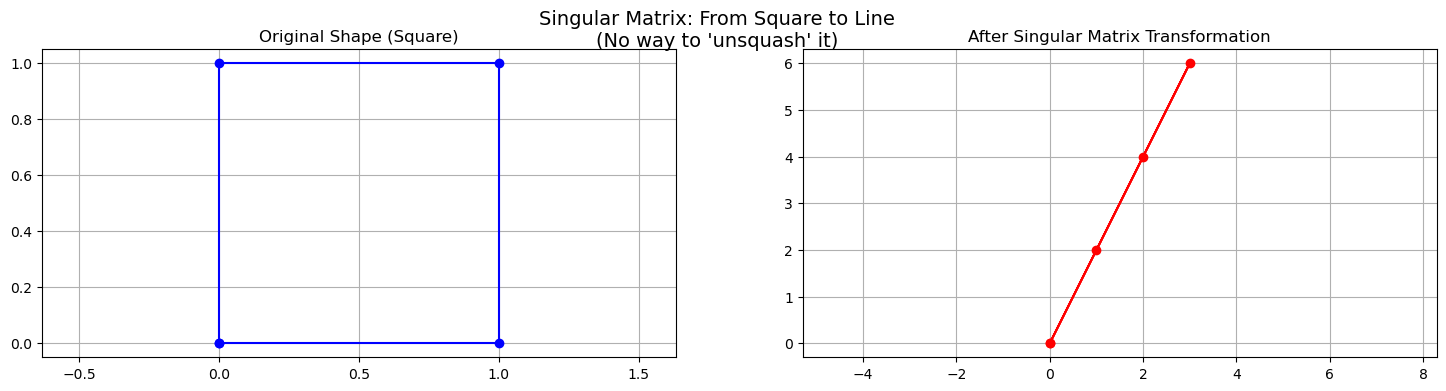

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Original square in 2D
square = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]  # close the shape
])

# Transformation matrix (singular)
A = np.array([
    [1, 2],
    [2, 4]  # second row is multiple of first
])

# Apply transformation
transformed_square = square @ A.T

# Plot original square
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
plt.plot(square[:,0], square[:,1], 'b-o')
plt.title("Original Shape (Square)")
plt.axis('equal')
plt.grid(True)

# Plot transformed "squashed" square
plt.subplot(1,2,2)
plt.plot(transformed_square[:,0], transformed_square[:,1], 'r-o')
plt.title("After Singular Matrix Transformation")
plt.axis('equal')
plt.grid(True)

plt.suptitle("Singular Matrix: From Square to Line\n(No way to 'unsquash' it)", fontsize=14)
plt.show()


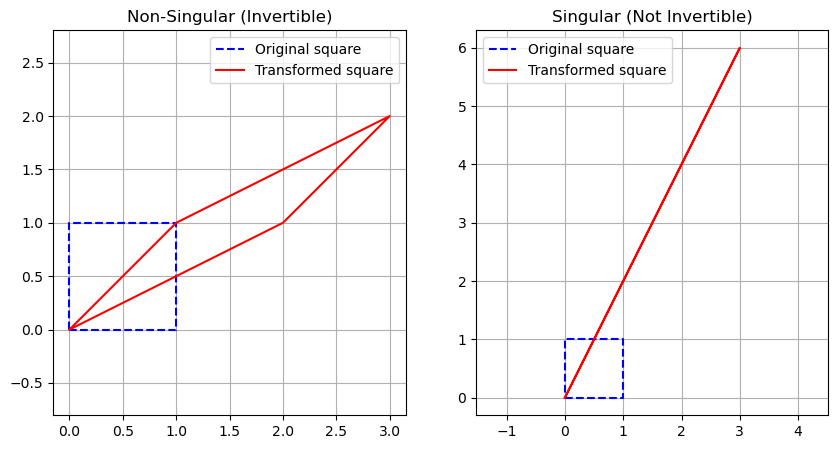

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_transformation(matrix, ax, title):
    # Original square (unit square)
    square = np.array([
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1],
        [0, 0]
    ])

    # Transform square
    transformed = square @ matrix.T

    # Plot original
    ax.plot(square[:, 0], square[:, 1], 'b--', label='Original square')
    # Plot transformed
    ax.plot(transformed[:, 0], transformed[:, 1], 'r-', label='Transformed square')
    ax.set_title(title)
    ax.legend()
    ax.axis('equal')
    ax.grid(True)

# Non-singular matrix example
non_singular_matrix = np.array([
    [2, 1],
    [1, 1]
])

# Singular matrix example
singular_matrix = np.array([
    [1, 2],
    [2, 4]
])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_transformation(non_singular_matrix, axes[0], "Non-Singular (Invertible)")
plot_transformation(singular_matrix, axes[1], "Singular (Not Invertible)")

plt.show()


In [29]:
def generic_gradient_descent(cost_function,gradient_function,initial_params, learning_rate=0.01, max_iterations=10, tolerance=1e-6):
    params = np.array(initial_params,dtype=float)
    cost_history = []
    params_history = []
    grad_history = []
    for i in range(max_iterations):
        cost = cost_function(params)
        cost_history.append(cost)
        
        gradient = gradient_function(params)
        grad_history.append(gradient.copy())
        new_param = params - learning_rate*gradient
        
        params_history.append(new_param.copy())
        
        if np.sum(np.abs(new_param-params))< tolerance:
            print(f"Converged after {i+1} iterations")
            break
        params = new_param
    
    return params, cost_history,grad_history, params_history

In [17]:
def cost_function(x):
    return x**2 - 4*x +4

def grad_function(x):
    return 2*x - 4

In [38]:
grad_function(1.4)

-1.2000000000000002

In [36]:
initial_x = 5
result, cost_history,grad_history ,params_history = generic_gradient_descent(cost_function, grad_function, initial_x, learning_rate=.6, max_iterations=10)

print("Final parameters:", result)
print("Cost history:", cost_history)
print("Gradient history:", grad_history)
print("Parameters history:", params_history)


Final parameters: 2.0000003072
Cost history: [9.0, 0.35999999999999943, 0.01440000000000019, 0.000576000000000132, 2.304000000030726e-05, 9.215999998701818e-07, 3.6863999852698726e-08, 1.4745600296350858e-09, 5.898215249544592e-11, 2.3594459719333827e-12]
Gradient history: [6.0, -1.1999999999999993, 0.2400000000000002, -0.04800000000000004, 0.009599999999999831, -0.0019200000000001438, 0.00038400000000038403, -7.679999999998799e-05, 1.535999999990878e-05, -3.0720000001593917e-06]
Parameters history: [1.4000000000000004, 2.12, 1.976, 2.0048, 1.99904, 2.000192, 1.9999616, 2.00000768, 1.999998464, 2.0000003072]


In [37]:
5*60

300

In [1]:
csv_data = """OrderID,OrderDate,Product,Price,Quantity,CustomerAge
101,2023-01-15,Widget A,"$10.50",5,35
102,2023-01-16,Widget B,"$20.00",2,
103,2023-01-17,,$15.25,3,42
104,2023-01-18,Widget A,"$10.50",-1,28
105,2023-01-19,Widget C,N/A,4,55
106,2023-01-20,widget a,"$10.50",6,35
"""

In [2]:
import pandas as pd
import io
import numpy as np

In [3]:
df = pd.read_csv(io.StringIO(csv_data))

In [11]:
print("--- 1. Initial Data ---")
print(df)
print("\n--- 2. Initial Info ---")
df.info()

--- 1. Initial Data ---
   OrderID   OrderDate   Product   Price  Quantity  CustomerAge
0      101  2023-01-15  Widget A  $10.50         5         35.0
1      102  2023-01-16  Widget B  $20.00         2         35.0
2      103  2023-01-17    Unknow  $15.25         3         42.0
3      104  2023-01-18  Widget A  $10.50        -1         28.0
4      105  2023-01-19  Widget C     NaN         4         55.0
5      106  2023-01-20  widget a  $10.50         6         35.0

--- 2. Initial Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      6 non-null      int64  
 1   OrderDate    6 non-null      object 
 2   Product      6 non-null      object 
 3   Price        5 non-null      object 
 4   Quantity     6 non-null      int64  
 5   CustomerAge  6 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 420.0+ bytes


In [5]:
df.isnull().sum()

OrderID        0
OrderDate      0
Product        1
Price          1
Quantity       0
CustomerAge    1
dtype: int64

In [7]:
median_age = df['CustomerAge'].median()
df['CustomerAge']=df['CustomerAge'].fillna(median_age)

In [9]:
df['Product'] = df['Product'].fillna('Unknow')

In [10]:
df['Price'] = df['Price'].replace('N/A',np.nan)

In [13]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [14]:
print("--- 1. Initial Data ---")
print(df)
print("\n--- 2. Initial Info ---")
df.info()

--- 1. Initial Data ---
   OrderID  OrderDate   Product   Price  Quantity  CustomerAge
0      101 2023-01-15  Widget A  $10.50         5         35.0
1      102 2023-01-16  Widget B  $20.00         2         35.0
2      103 2023-01-17    Unknow  $15.25         3         42.0
3      104 2023-01-18  Widget A  $10.50        -1         28.0
4      105 2023-01-19  Widget C     NaN         4         55.0
5      106 2023-01-20  widget a  $10.50         6         35.0

--- 2. Initial Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      6 non-null      int64         
 1   OrderDate    6 non-null      datetime64[ns]
 2   Product      6 non-null      object        
 3   Price        5 non-null      object        
 4   Quantity     6 non-null      int64         
 5   CustomerAge  6 non-null      float64       
dtypes: datetime64

In [15]:
df['Price'] = df['Price'].str.replace('$',"").astype(float)

In [16]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [17]:
print("--- 1. Initial Data ---")
print(df)
print("\n--- 2. Initial Info ---")
df.info()

--- 1. Initial Data ---
   OrderID  OrderDate   Product  Price  Quantity  CustomerAge
0      101 2023-01-15  Widget A  10.50         5         35.0
1      102 2023-01-16  Widget B  20.00         2         35.0
2      103 2023-01-17    Unknow  15.25         3         42.0
3      104 2023-01-18  Widget A  10.50        -1         28.0
4      105 2023-01-19  Widget C  13.35         4         55.0
5      106 2023-01-20  widget a  10.50         6         35.0

--- 2. Initial Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      6 non-null      int64         
 1   OrderDate    6 non-null      datetime64[ns]
 2   Product      6 non-null      object        
 3   Price        6 non-null      float64       
 4   Quantity     6 non-null      int64         
 5   CustomerAge  6 non-null      float64       
dtypes: datetime64[ns](1)

In [18]:
# handle currupted data/invalid data

median_quantity = df[df['Quantity'] > 0]['Quantity'].median()

In [21]:
df.loc[df['Quantity']<=0,'Quantity'] = median_quantity

In [22]:
# standardize the data
df['Product'] = df['Product'].str.title()

In [24]:
print("--- 1. Initial Data ---")
print(df)

--- 1. Initial Data ---
   OrderID  OrderDate   Product  Price  Quantity  CustomerAge
0      101 2023-01-15  Widget A  10.50         5         35.0
1      102 2023-01-16  Widget B  20.00         2         35.0
2      103 2023-01-17    Unknow  15.25         3         42.0
3      104 2023-01-18  Widget A  10.50         4         28.0
4      105 2023-01-19  Widget C  13.35         4         55.0
5      106 2023-01-20  Widget A  10.50         6         35.0


In [25]:
# feature engineering
df['TotalSale'] = df['Price']* df['Quantity']

In [26]:
df['DayOfWeek'] = df['OrderDate'].dt.day_name()

In [27]:
print("--- 1. Initial Data ---")
print(df)
print("\n--- 2. Initial Info ---")
df.info()

--- 1. Initial Data ---
   OrderID  OrderDate   Product  Price  Quantity  CustomerAge  TotalSale  \
0      101 2023-01-15  Widget A  10.50         5         35.0      52.50   
1      102 2023-01-16  Widget B  20.00         2         35.0      40.00   
2      103 2023-01-17    Unknow  15.25         3         42.0      45.75   
3      104 2023-01-18  Widget A  10.50         4         28.0      42.00   
4      105 2023-01-19  Widget C  13.35         4         55.0      53.40   
5      106 2023-01-20  Widget A  10.50         6         35.0      63.00   

   DayOfWeek  
0     Sunday  
1     Monday  
2    Tuesday  
3  Wednesday  
4   Thursday  
5     Friday  

--- 2. Initial Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      6 non-null      int64         
 1   OrderDate    6 non-null      datetime64[ns]
 2   Product     

In [2]:
class Node:
    def __init__(self,threshold=None, feature=None,left=None,right=None,value=None):
        self.value = value
        self.right = right
        self.left = left
        self.feature = feature 
        self.threshold = threshold
    def is_leaf_node(self):
        return self.value is not None
    

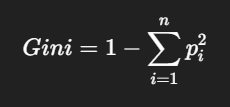
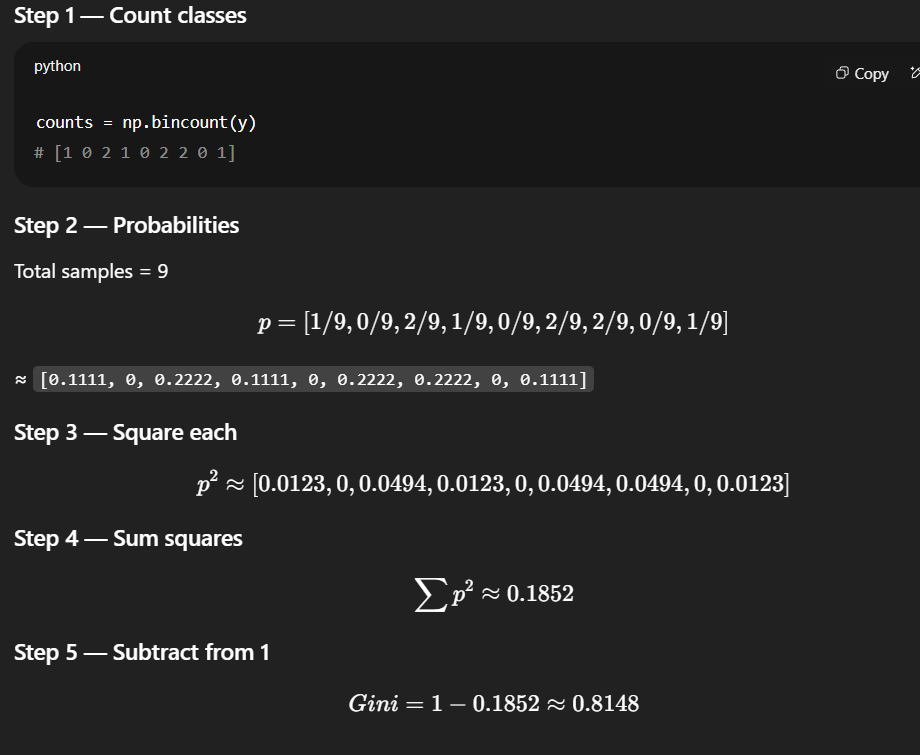


## Example dataset (2 features)

```
Index  F0  F1   y
0      2   1    0
1      1   2    0
2      3   1    0
3      4   3    1
4      6   2    1
5      5   4    1
```

So:

```python
X = np.array([
  [2, 1],
  [1, 2],
  [3, 1],
  [4, 3],
  [6, 2],
  [5, 4]
])
y = np.array([0,0,0,1,1,1])
```

6 samples, 2 features, two classes (0 and 1).

---

## 1) Parent node impurity (Gini)

Counts: class0 = 3, class1 = 3.
Total n = 6.

Probabilities:

* $p_0 = 3/6 = 0.5$
* $p_1 = 3/6 = 0.5$

Gini parent:

$$
G_{parent} = 1 - (p_0^2 + p_1^2) = 1 - (0.5^2 + 0.5^2)
= 1 - (0.25 + 0.25) = 1 - 0.5 = 0.5
$$

---

## 2) Candidate thresholds

In the simple implementation each candidate threshold = a **unique value** from the feature column.

Feature 0 values: `[2,1,3,4,6,5]` → `np.unique` → `[1,2,3,4,5,6]`
Feature 1 values: `[1,2,1,3,2,4]` → `np.unique` → `[1,2,3,4]`

We will test a few thresholds to illustrate. (You could test them all in code; I pick one strong candidate per feature and show calculations.)

---

## 3) Test Feature 0, threshold = 3

**Step A — split indices** using `_split(X[:,0], 3)`:

* `X[:,0]` = `[2,1,3,4,6,5]`
* Left condition `<= 3` → indices `[0,1,2]` (values 2,1,3)
* Right condition `> 3` → indices `[3,4,5]` (values 4,6,5)

So:

* `left_idx = [0,1,2]` → `y_left = [0,0,0]`
* `right_idx = [3,4,5]` → `y_right = [1,1,1]`

**Step B — Gini of children**

* Left: all 0 → counts (class0=3, class1=0). Probabilities: $p_0=1, p_1=0$.
  $G_{left} = 1 - (1^2 + 0^2) = 0$.

* Right: all 1 → counts (0,3). Probabilities: $p_0=0, p_1=1$.
  $G_{right} = 1 - (0^2 + 1^2) = 0$.

**Step C — weighted child impurity**

* $n_L = 3,\; n_R=3,\; n=6$

$$
Weighted = \frac{3}{6}\cdot 0 + \frac{3}{6}\cdot 0 = 0
$$

**Step D — Information Gain**

$$
IG = G_{parent} - Weighted = 0.5 - 0 = 0.5
$$

This is a **perfect split** (both children pure), IG = 0.5.

---

## 4) Test Feature 1, threshold = 2

**Step A — split indices** using `_split(X[:,1], 2)`:

* `X[:,1]` = `[1,2,1,3,2,4]`
* Left condition `<= 2` → indices `[0,1,2,4]` (values 1,2,1,2)
* Right condition `> 2` → indices `[3,5]` (values 3,4)

So:

* `left_idx = [0,1,2,4]` → `y_left = [0,0,0,1]`
* `right_idx = [3,5]` → `y_right = [1,1]`

**Step B — Gini of children**
Left (4 samples, labels \[0,0,0,1]):

* counts: class0 = 3, class1 = 1
* probs: $p_0 = 3/4 = 0.75,\; p_1 = 1/4 = 0.25$
* square them: $p_0^2 = 0.5625,\; p_1^2 = 0.0625$
* $G_{left} = 1 - (0.5625 + 0.0625) = 1 - 0.625 = 0.375$

Right (2 samples, labels \[1,1]):

* pure class1 → $G_{right} = 0$

**Step C — weighted child impurity**

* $n_L=4,\; n_R=2,\; n=6$

$$
Weighted = \frac{4}{6}\cdot 0.375 + \frac{2}{6}\cdot 0
= \frac{4}{6}\cdot 0.375
= \frac{4 \times 0.375}{6}
= \frac{1.5}{6} = 0.25
$$

(Or compute: 4/6 = 0.666666..., times 0.375 = 0.25 exactly.)

**Step D — Information Gain**

$$
IG = 0.5 - 0.25 = 0.25
$$

So feature1\@2 gives IG = 0.25 — good but worse than feature0\@3.

---

## 5) Conclusion — choose the best split

Comparing:

* Feature0 threshold 3 → IG = **0.5**
* Feature1 threshold 2 → IG = **0.25**

So **Feature 0 ≤ 3** is the best split. After applying it the two child nodes are pure and tree building stops there (for those nodes).

---

## 6) How this appears in code (sketch)

```python
# find best split (pseudo)
best_gain = -inf
for feat in [0,1]:
    for thresh in np.unique(X[:,feat]):
        left_idx, right_idx = np.where(X[:,feat] <= thresh)[0], np.where(X[:,feat] > thresh)[0]
        if len(left_idx)==0 or len(right_idx)==0: continue
        gain = information_gain(y, X[:,feat], thresh)
        if gain > best_gain:
            best_gain = gain
            best_feat = feat
            best_thresh = thresh

# best_feat == 0, best_thresh == 3 in our example
left_X, left_y  = X[left_idx,:], y[left_idx]
right_X, right_y = X[right_idx,:], y[right_idx]
# recursively call _grow(left_X, left_y), _grow(right_X, right_y)
```

---

## Short summary / mental model

* **Thresholds** come from values in `X[:, feat]` (or midpoints between unique values in fancier implementations).
* For each `(feature, threshold)` we use `_split` to get indices for left/right.
* From the left/right labels we compute child Ginis, weight them by child sizes, and subtract from parent Gini → that’s **IG**.
* We pick the `(feature, threshold)` with **highest IG** and **apply that split** (i.e., actually partition `X` and `y`), then recurse.

---



In [14]:
class DecisionTree:
    def __init__(self,max_depth=5,min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
        
    def fit(self,X,y):
        self.root  = self._grow(X,y,depth=0)
        
    def _grow(self,X,y,depth):
        n_samples,num_features = X.shape
        num_labels = len(np.unique(y))
        
        if (depth >= self.max_depth  or 
            num_labels ==1 or 
            n_samples < self.min_samples_split):
            leaf_value = self._most_common(y)
            return Node(value=leaf_value)
        
        best_feat,best_thresh = self._best_split(X,y,num_features)
        left_idx,right_idx = self._split(X[:,best_feat],best_thresh)
        left = self._grow(X[left_idx,:],y[left_idx],depth+1)
        right = self._grow(X[right_idx,:],y[right_idx],depth+1)
        return Node(threshold=best_thresh,left=left,right=right,feature=best_feat)
    
    def _gini(self,y):
        counts = np.bincount(y)
        probs = counts/len(y)
        return 1 - np.sum(probs**2)
    
    def _split(self,X_column,threshold):
        left_idx = np.where(X_column <= threshold)[0]
        right_idx = np.where(X_column > threshold)[0]
        return left_idx, right_idx
    
    def _information_gain(self,y,X_column,threshold):
        parent_impurity = self._gini(y)
        
        left_idx,right_idx = self._split(X_column,threshold)
        if len(left_idx) == 0 or len(right_idx) == 0:
            return 0
        
        n = len(y)
        n_l , n_r = len(left_idx), len(right_idx)
        child_impurity = (n_l/n) * self._gini(y[left_idx]) + (n_r/n) * self._gini(y[right_idx])
        
        return parent_impurity - child_impurity
    
    def _best_split(self,x,y,num_features):
        best_gain = -1
        split_feat ,split_thresh = None,None
        for feat in range(num_features):
            thresholds = np.unique(x[:,feat])
            for threh in thresholds:
                gain = self._information_gain(y,x[:,feat],threh)
                if  gain > best_gain:
                    best_gain = gain
                    split_feat = feat
                    split_thresh = threh
        return split_feat, split_thresh
    
    def _most_common(self,y):
        return np.bincount(y).argmax()
    
    def _traverse(self,x,node):
        if node.is_leaf():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse(x,node.left)
        else:
            return self._traverse(x,node.right)
    
    def predict(self,X):
        return np.array([self._traverse(x,self.root) for x in X])
    

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTree(max_depth=5)
tree.fit(X_train, y_train)
preds = tree.predict(X_test)

acc = np.mean(preds == y_test)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.930


Question 9 
Write a Python function to split a dataset into training and testing sets. 


In [19]:
import numpy as np

def train_test_split(X,y,test_size=0.2,shuffle=True,random_state=None):
    if len(X) != len(y):
        raise ValueError("X and y must have the same number of samples")
    
    X = np.array(X)
    y = np.array(y)
    
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    
    if shuffle:
        if random_state is not None:
            np.random.seed(random_state)
        np.random.shuffle(indices)
        
    n_test = int(n_samples * test_size)
    
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices] 
    return X_train, X_test, y_train, y_test


In [20]:
X_data = np.arange(20).reshape(10,2)
y_data = np.arange(10)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
print("X_train:\n", X_train)
print("y_test:\n", y_test)

X_train:
 [[2.073e+01 3.112e+01 1.357e+02 ... 1.659e-01 2.868e-01 8.218e-02]
 [9.029e+00 1.733e+01 5.879e+01 ... 1.750e-01 4.228e-01 1.175e-01]
 [2.109e+01 2.657e+01 1.427e+02 ... 2.903e-01 4.098e-01 1.284e-01]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]
y_test:
 [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1]


# Develop a Python script that automates the process of hyperparameter tuning using grid search

In [22]:
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators':[50, 100, 200],
    'max_depth':[None, 10, 20,30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
}

In [24]:
grid_search = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,scoring='accuracy')

In [25]:
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [26]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy: ", test_accuracy)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.9626373626373625
Test accuracy:  0.9649122807017544


# Neural Networks

In [1]:
from torchvision import transforms
from PIL import Image
import numpy as np

# Fake image (3x3 RGB)
img = Image.fromarray(np.random.randint(0, 256, (3, 3, 3), dtype=np.uint8))

tensor_img = transforms.ToTensor()(img)
print(tensor_img.shape)     # torch.Size([3, 3, 3]) → (channels, height, width)
print(tensor_img.min(), tensor_img.max())  # Between 0.0 and 1.0


torch.Size([3, 3, 3])
tensor(0.0784) tensor(0.9059)


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True,transform = transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True,transform = transform)

train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=False)



100%|██████████| 9.91M/9.91M [11:41<00:00, 14.1kB/s]
100%|██████████| 28.9k/28.9k [00:01<00:00, 22.3kB/s]
100%|██████████| 1.65M/1.65M [01:17<00:00, 21.2kB/s]
100%|██████████| 4.54k/4.54k [00:01<00:00, 3.81kB/s]


In [2]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN,self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28 , 128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self,x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = SimpleNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)

epochs=5 

train_losses,val_losses = [],[]

for epoch in range(epochs):
    model.train()
    running_loss=0.0
    for images,labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    avg_train_loss = running_loss/len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_train_loss:.4f}")



Epoch [1/5], Loss: 0.8986
Epoch [2/5], Loss: 0.3394
Epoch [3/5], Loss: 0.2835
Epoch [4/5], Loss: 0.2517
Epoch [5/5], Loss: 0.2266


In [3]:
model.eval()
correct,total =0,0
with torch.no_grad():
    for images,labels in test_loader:
        outputs = model(images)
        _ , predicated = torch.max(outputs,1)
        total+=labels.size(0)
        correct+=(predicated==labels).sum().item()

In [4]:
test_acc = correct / total
print(f"\nTest accuracy: {test_acc:.4f}")

# 6. Make a Prediction for the First Test Image
image, label = test_dataset[0]
with torch.no_grad():
    output = model(image.unsqueeze(0))  # Add batch dimension
    predicted_class = output.argmax(dim=1).item()

print(f"Predicted class for the first test image: {predicted_class}")
print(f"Actual class: {label}")


Test accuracy: 0.9371
Predicted class for the first test image: 7
Actual class: 7


[Input 224x224x3]
 → Conv64 → Conv64 → MaxPool
 → Conv128 → Conv128 → MaxPool
 → Conv256 → Conv256 → Conv256 → MaxPool
 → Conv512 → Conv512 → Conv512 → MaxPool
 → Conv512 → Conv512 → Conv512 → MaxPool
 → Flatten → FC4096 → FC4096 → FC1000 (softmax)

 | Block            | Layers                                                     | Output Shape |
| ---------------- | ---------------------------------------------------------- | ------------ |
| **Input**        | —                                                          | 224×224×3    |
| **Conv Block 1** | Conv(64, 3×3) → Conv(64, 3×3) → MaxPool(2×2, stride=2)     | 112×112×64   |
| **Conv Block 2** | Conv(128, 3×3) → Conv(128, 3×3) → MaxPool                  | 56×56×128    |
| **Conv Block 3** | Conv(256, 3×3) → Conv(256, 3×3) → Conv(256, 3×3) → MaxPool | 28×28×256    |
| **Conv Block 4** | Conv(512, 3×3) → Conv(512, 3×3) → Conv(512, 3×3) → MaxPool | 14×14×512    |
| **Conv Block 5** | Conv(512, 3×3) → Conv(512, 3×3) → Conv(512, 3×3) → MaxPool | 7×7×512      |
| **FC Layers**    | Flatten → FC(4096) → FC(4096) → FC(1000, softmax)          | 1000         |


In [7]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [8]:
base_model = VGG16(weights = 'imagenet',include_top = False,input_shape=(150,150,3))
for layer in base_model.layers:
    layer.trainable=False

x = base_model.output
x = Flatten()(x)
x = Dense(512,activation='relu')(x)
predications = Dense(1,activation='sigmoid')(x)

model = Model(inputs=base_model.input,outputs=predications)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuarcy'])
model.summary()

 2629632/58889256 ━━━━━━━━━━━━━━━━━━━━ 5:39 6us/step

KeyboardInterrupt: 

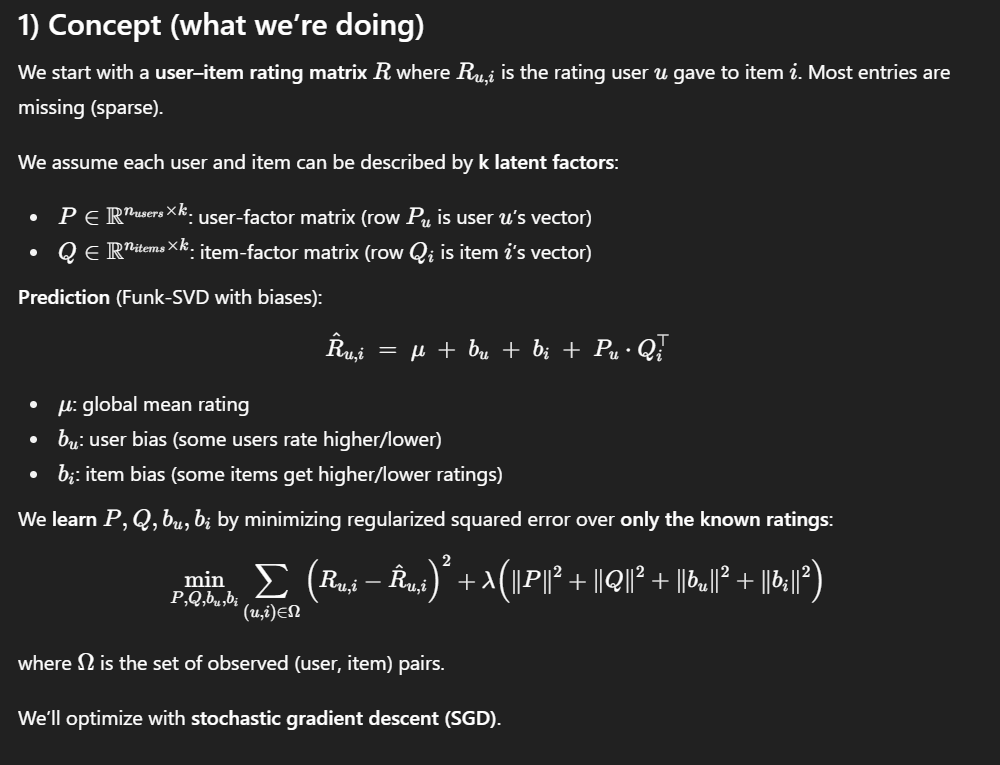

In [9]:
import numpy as np
from typing import List, Tuple, Dict

# ---------------------------
# Utilities
# ---------------------------

def build_ui_matrix(
    triples: List[Tuple[int, int, float]],
    n_users: int,
    n_items: int,
    fill=np.nan
) -> np.ndarray:
    """
    Build a dense user-item matrix with np.nan for missing entries.
    triples: list of (user_id, item_id, rating) with 0-based user & item ids
    """
    R = np.full((n_users, n_items), fill, dtype=float)
    for u, i, r in triples:
        R[u, i] = r
    return R


def train_test_split_known(
    triples: List[Tuple[int, int, float]],
    test_ratio=0.2,
    random_state=42
) -> Tuple[List[Tuple[int,int,float]], List[Tuple[int,int,float]]]:
    """
    Split only the KNOWN ratings (triples) into train/test.
    """
    rng = np.random.default_rng(random_state)
    idx = np.arange(len(triples))
    rng.shuffle(idx)
    n_test = int(len(triples) * test_ratio)
    test_idx = idx[:n_test]
    train_idx = idx[n_test:]

    train = [triples[i] for i in train_idx]
    test = [triples[i] for i in test_idx]
    return train, test


# ---------------------------
# Matrix Factorization (Funk-SVD with biases) via SGD
# ---------------------------

class MFRecommender:
    def __init__(
        self,
        n_users: int,
        n_items: int,
        n_factors: int = 20,
        lr: float = 0.01,
        reg: float = 0.02,
        n_epochs: int = 30,
        random_state: int = 42,
        use_bias: bool = True
    ):
        self.n_users = n_users
        self.n_items = n_items
        self.k = n_factors
        self.lr = lr
        self.reg = reg
        self.n_epochs = n_epochs
        self.rng = np.random.default_rng(random_state)
        self.use_bias = use_bias

        # Parameters (learned)
        # P: user factors, Q: item factors
        self.P = 0.1 * self.rng.standard_normal((n_users, self.k))
        self.Q = 0.1 * self.rng.standard_normal((n_items, self.k))
        self.bu = np.zeros(n_users)
        self.bi = np.zeros(n_items)
        self.mu = 0.0

    def fit(self, train_triples: List[Tuple[int,int,float]], val_triples=None, verbose=True):
        """
        Train with SGD over observed triples (u, i, r).
        Optionally report RMSE on val set each epoch.
        """
        if len(train_triples) == 0:
            raise ValueError("No training ratings provided.")

        # Initialize global mean as mean of training ratings
        self.mu = np.mean([r for _, _, r in train_triples]) if self.use_bias else 0.0

        for epoch in range(1, self.n_epochs + 1):
            self.rng.shuffle(train_triples)
            sse = 0.0

            for (u, i, r) in train_triples:
                # Prediction
                pred = self.predict_single(u, i)
                err = r - pred  # residual

                # Cache for faster update
                Pu = self.P[u].copy()
                Qi = self.Q[i].copy()

                # --- Update factors ---
                # Gradient wrt P[u]: -2*err*Q[i] + 2*reg*P[u]
                self.P[u] += self.lr * (err * Qi - self.reg * Pu)
                # Gradient wrt Q[i]: -2*err*P[u] + 2*reg*Q[i]
                self.Q[i] += self.lr * (err * Pu - self.reg * Qi)

                # --- Update biases (if used) ---
                if self.use_bias:
                    self.bu[u] += self.lr * (err - self.reg * self.bu[u])
                    self.bi[i] += self.lr * (err - self.reg * self.bi[i])

                sse += err * err

            rmse = np.sqrt(sse / len(train_triples))

            if verbose:
                msg = f"Epoch {epoch:02d} | Train RMSE: {rmse:.4f}"
                if val_triples:
                    val_rmse = self.rmse(val_triples)
                    msg += f" | Val RMSE: {val_rmse:.4f}"
                print(msg)

    def predict_single(self, u: int, i: int) -> float:
        """
        Predict rating for a single (user, item).
        Clamps result to [1, 5] for typical 1-5 rating scales (optional).
        """
        dot = self.P[u] @ self.Q[i]
        if self.use_bias:
            pred = self.mu + self.bu[u] + self.bi[i] + dot
        else:
            pred = dot
        # Optional clamping depending on your rating scale:
        return float(pred)

    def rmse(self, triples: List[Tuple[int,int,float]]) -> float:
        if len(triples) == 0:
            return np.nan
        se = 0.0
        for (u, i, r) in triples:
            pred = self.predict_single(u, i)
            se += (r - pred) ** 2
        return float(np.sqrt(se / len(triples)))

    def recommend_for_user(
        self, u: int, top_n: int = 5, known_items: set = None
    ) -> List[Tuple[int, float]]:
        """
        Recommend top-N items for user u by predicted score.
        known_items: set of item ids to exclude (already seen/rated).
        Returns list of (item_id, predicted_score).
        """
        if known_items is None:
            known_items = set()

        # Predict for all items not in known_items
        all_items = np.arange(self.n_items)
        mask = np.array([i not in known_items for i in all_items])
        candidates = all_items[mask]

        # Vectorized predict: (P[u] dot Q[candidates]^T) + biases
        scores = self.Q[candidates] @ self.P[u]  # (num_candidates,)
        if self.use_bias:
            scores = self.mu + self.bu[u] + self.bi[candidates] + scores

        # Top-N
        top_idx = np.argsort(scores)[::-1][:top_n]
        top_items = candidates[top_idx]
        top_scores = scores[top_idx]
        return list(zip(top_items.tolist(), top_scores.tolist()))


In [10]:
# ---------------------------
# Demo dataset (toy)
# ---------------------------

# Ratings as (user, item, rating) with 0-based IDs
ratings = [
    (0, 0, 5), (0, 1, 3), (0, 3, 1),
    (1, 0, 4), (1, 2, 1), (1, 3, 1),
    (2, 1, 1), (2, 2, 5), (2, 3, 4),
    (3, 0, 1), (3, 2, 4),
    (4, 1, 1), (4, 3, 5)
]

n_users = 5
n_items = 6

R = build_ui_matrix(ratings, n_users, n_items)
print("User-Item matrix (np.nan indicates missing):\n", R)

# Split known ratings into train/test
train, test = train_test_split_known(ratings, test_ratio=0.3, random_state=123)
print("\n#train:", len(train), " #test:", len(test))

# Train MF model
mf = MFRecommender(
    n_users=n_users,
    n_items=n_items,
    n_factors=8,      # latent dimension
    lr=0.05,
    reg=0.02,
    n_epochs=50,
    random_state=1,
    use_bias=True
)

mf.fit(train_triples=train, val_triples=test, verbose=True)

print("\nFinal Train RMSE:", mf.rmse(train))
print("Final  Test RMSE:", mf.rmse(test))

# Recommendations for a user (exclude already-rated items)
user_id = 0
known_items_user0 = {i for (u, i, r) in ratings if u == user_id}
recs = mf.recommend_for_user(user_id, top_n=3, known_items=known_items_user0)
print(f"\nTop-3 recommendations for user {user_id} (item_id, predicted_score):")
for iid, score in recs:
    print(f"  item {iid}: {score:.3f}")


User-Item matrix (np.nan indicates missing):
 [[ 5.  3. nan  1. nan nan]
 [ 4. nan  1.  1. nan nan]
 [nan  1.  5.  4. nan nan]
 [ 1. nan  4. nan nan nan]
 [nan  1. nan  5. nan nan]]

#train: 10  #test: 3
Epoch 01 | Train RMSE: 1.6134 | Val RMSE: 2.2690
Epoch 02 | Train RMSE: 1.5286 | Val RMSE: 2.3196
Epoch 03 | Train RMSE: 1.4573 | Val RMSE: 2.3639
Epoch 04 | Train RMSE: 1.3970 | Val RMSE: 2.4022
Epoch 05 | Train RMSE: 1.3438 | Val RMSE: 2.4350
Epoch 06 | Train RMSE: 1.2952 | Val RMSE: 2.4575
Epoch 07 | Train RMSE: 1.2482 | Val RMSE: 2.4749
Epoch 08 | Train RMSE: 1.2016 | Val RMSE: 2.4871
Epoch 09 | Train RMSE: 1.1514 | Val RMSE: 2.5002
Epoch 10 | Train RMSE: 1.0960 | Val RMSE: 2.5061
Epoch 11 | Train RMSE: 1.0329 | Val RMSE: 2.5062
Epoch 12 | Train RMSE: 0.9624 | Val RMSE: 2.5024
Epoch 13 | Train RMSE: 0.8838 | Val RMSE: 2.4934
Epoch 14 | Train RMSE: 0.7984 | Val RMSE: 2.4806
Epoch 15 | Train RMSE: 0.7079 | Val RMSE: 2.4688
Epoch 16 | Train RMSE: 0.6172 | Val RMSE: 2.4547
Epoch 17 | T

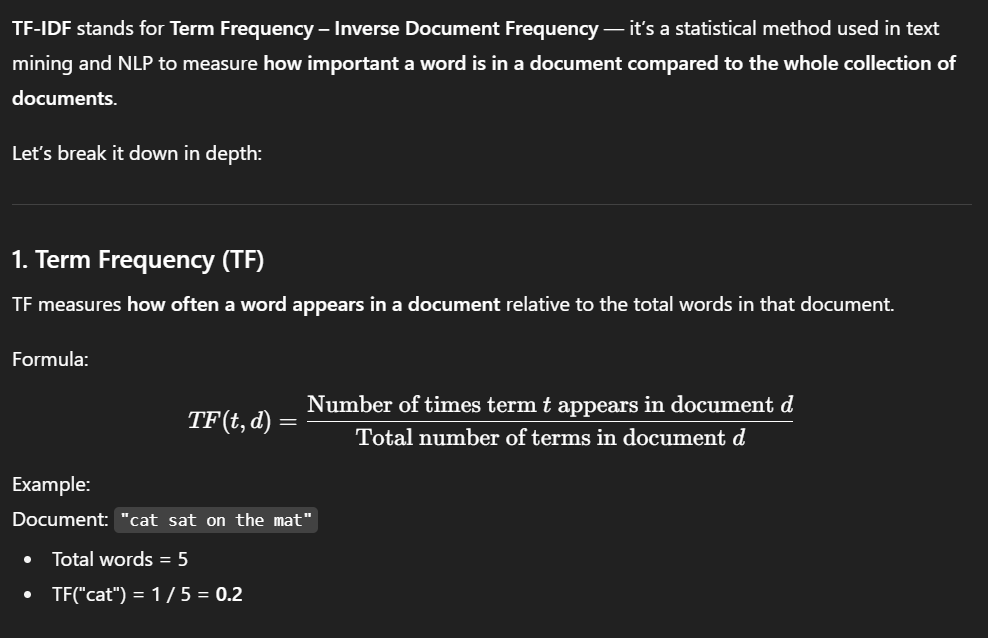
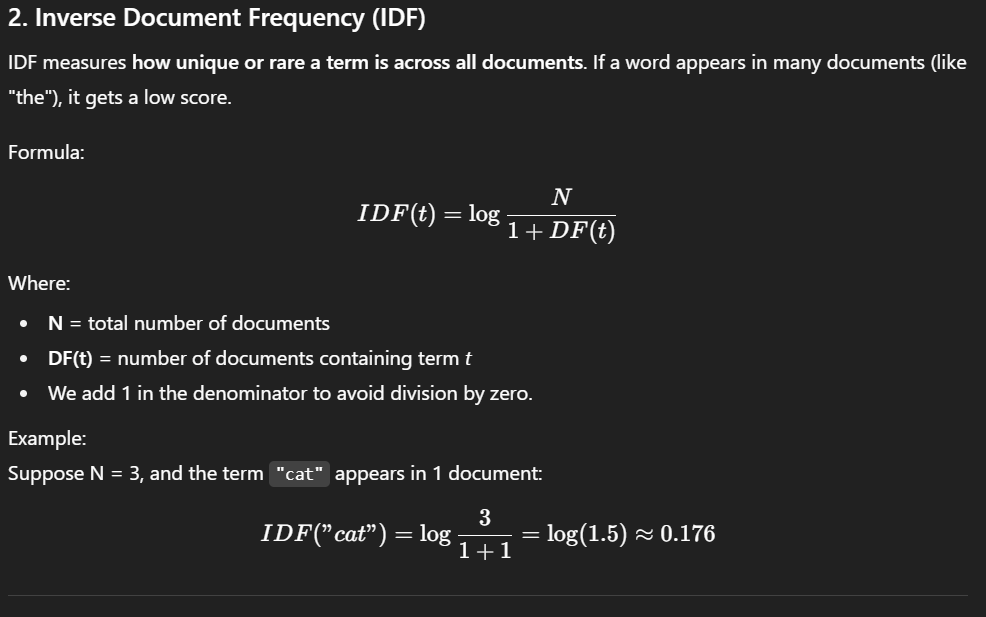
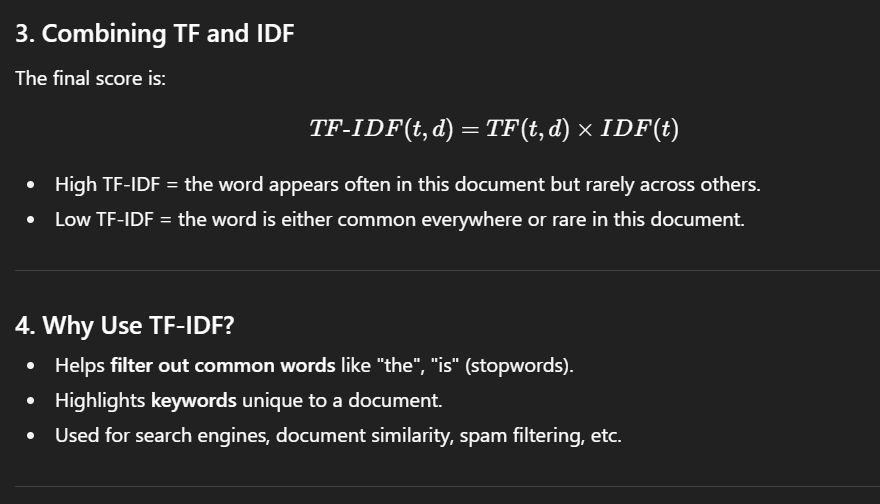

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample corpus
docs = [
    "cat sat on the mat",
    "dog chased the cat",
    "the cat climbed the tree"
]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(docs)

# Get feature names
terms = vectorizer.get_feature_names_out()

# Convert to dense matrix for display
import pandas as pd
df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
print(df)


        cat    chased   climbed       dog  ...       on      sat       the      tree
0  0.307144  0.000000  0.000000  0.000000  ...  0.52004  0.52004  0.307144  0.000000
1  0.359594  0.608845  0.000000  0.608845  ...  0.00000  0.00000  0.359594  0.000000
2  0.305232  0.000000  0.516802  0.000000  ...  0.00000  0.00000  0.610463  0.516802

[3 rows x 9 columns]
